# Regression with MLPs
In this lesson we will see how an MLP model can learn to predict the value of a function in a given point. In particular, we will see how the model gradually learns to approximate the function and what are the limits of generalization of such a model.

_Notable caveat to this tutorial: this is an example of regression with MLPs, but in this task a [polynomial regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) could achieve better results with definitely less effort._

If you already have no done it, [try running this Test jupyter notebook](https://github.com/LucaCappelletti94/bioinformatics_practice/blob/master/Notebooks/Testing%20that%20everything%20works.ipynb) and check that everything does work nominally.

To run this jupyter you will need to have installed packages such as [sklearn](https://scikit-learn.org/stable/index.html) and [numpy](https://docs.scipy.org/doc/numpy/user/index.html), so to get started just run the following:

```bash
pip install numpy sklearn matplolib
```

In [1]:
# We import these packages using the standard notations
import numpy as np
import matplotlib.pyplot as plt

## Choosing a function to approximate
In this tutorial we get to choose a function that we will try to approximate. I will choose a combination of trigonometric functions, and I will pretend this is a signal that [I have received from some device](https://www.youtube.com/watch?v=AvUbqY1S-QQ).

Side note: I will use [type hinting](https://www.python.org/dev/peps/pep-0484/) to clarify what comes in and out of a function, but it is just a form on documentation. It does not do anything if not signal an IDE what the function has to receive and return.

In [41]:
def signal(x:np.ndarray)->np.ndarray:
    """An alien signal."""
    return (np.sin(x)**2 + np.sin(x+1)) / (1+np.sqrt(np.abs(x))) + np.log(1+np.abs(x))

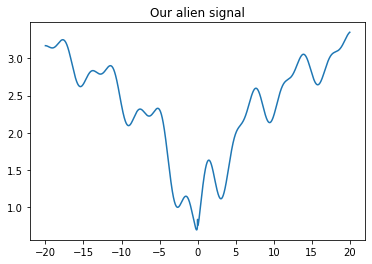

In [44]:
# Plotting the function
x = np.linspace(-20, 20, num=1000000)
plt.plot(x, signal(x))
plt.title("Our alien signal")
plt.show()

## Sampling a signal
Now, if we were to posess the original analytical signal (we do but we are pretending to not have it) it would be quite useless to try and build a model to predict it. In a real scenario, our device cannot pick up a continuos signal, but only an discrete approximation of the signal.

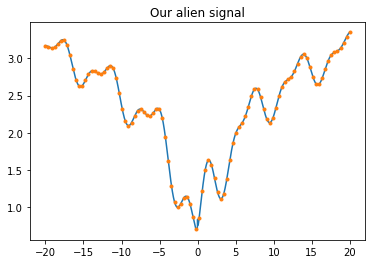

In [73]:
# Plotting the function
real_signal = np.linspace(-20, 20, num=1000000)
received_signal = np.linspace(-20, 20, num=100)
plt.plot(real_signal, signal(real_signal))
plt.plot(received_signal, signal(received_signal), '.')
plt.title("Our alien signal")
plt.show()

## Building a training and test dataset
To determine if a model is actually learning something usefull and not creating an hashmap of the values we need to create a proper training and testing dataset. Repartitions of the 80/20 kind are commonplace.

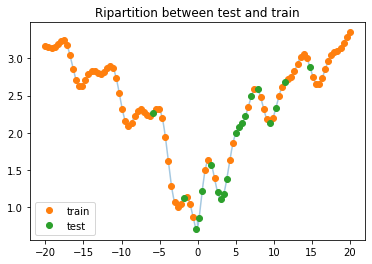

In [86]:
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(received_signal, signal(received_signal), test_size=0.2, random_state=42)

plt.plot(real_signal, signal(real_signal), alpha=0.4)
plt.plot(x_train, y_train, 'o', label="train")
plt.plot(x_test, y_test, 'o', label="test")
plt.title("Ripartition between test and train")
plt.legend()
plt.show()